In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline



In [2]:
file_path = "C:\\Users\\User\\Documents\\Flatiron\\Phase1\\Project\\bom.movie_gross.csv\\bom.movie_gross.csv"
# Load the data into a pandas DataFrame.
df = pd.read_csv(file_path)


In [3]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
df.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
df.shape

(3387, 5)

In [8]:
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
db_file_path = "C:\\Users\\User\\Documents\\Flatiron\\Phase1\\Project\\dsc-phase1-project\\im.db"

# Connect to the SQLite database.
conn = sqlite3.connect(db_file_path)

# Define the SQL query to retrieve data from the database.
query = "SELECT * FROM movie_basics;"

# Use pandas to read data from the database and store it in a DataFrame.
df1 = pd.read_sql_query(query, conn)
df1.head(5)

# Close the connection to the database.
#conn.close()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
query = "SELECT * FROM movie_ratings;"

# Use pandas to read data from the database and store it in a DataFrame.
df2 = pd.read_sql_query(query, conn)
df2.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
#Joining the two imdb tables 
imdb = df1.join(df2.set_index('movie_id'),
                                   how = 'inner', on = 'movie_id', rsuffix = 'r')

In [12]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
#Drop columns that are not needed.
imdb = imdb.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])

In [14]:
#Confirmthe dataframe only has required columns
imdb.head()

,movie_id,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [15]:
#Renaming pimary title to title to facilitate joining with bom.movie_gross.csv
imdb.rename(columns = {'primary_title':'title'}, inplace = True)

In [16]:
#Confirming the column was renamed
imdb.head()

,movie_id,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [17]:
imdb

,movie_id,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5
146129,tt9914942,La vida sense la Sara Amat,2019,None,6.6


In [18]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
imdb.rename(columns = {'start_year':'year'}, inplace = True)

In [20]:
imdb

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5
146129,tt9914942,La vida sense la Sara Amat,2019,None,6.6


In [21]:
dataset = pd.merge(imdb, df, on=['title', 'year'], how='inner')
dataset 

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,NaN
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4"
...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,2018,Drama,7.2,CJ,501000.0,NaN
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000
1844,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,NaN
1845,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,NaN


In [22]:
dataset.dropna(inplace=True)

In [23]:
dataset

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4"
5,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,FD,13100000.0,10800000
...,...,...,...,...,...,...,...,...
1830,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",7.3,A24,44100000.0,35300000
1836,tt7959026,The Mule,2018,"Crime,Drama,Thriller",7.1,WB,103800000.0,68700000
1838,tt8097306,Nobody's Fool,2018,"Comedy,Drama,Romance",4.6,Par.,31700000.0,1800000
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000


In [24]:

dataset['foreign_gross']

1         8000000
2       129900000
3        26900000
4         1,019.4
5        10800000
          ...    
1830     35300000
1836     68700000
1838      1800000
1843     82100000
1846     16100000
Name: foreign_gross, Length: 1257, dtype: object

In [25]:
dataset['foreign_gross'] = pd.to_numeric(dataset['foreign_gross'], errors='coerce')

# Drop rows where 'foreign_gross' is NaN, which means it originally had a string datatype
dataset.dropna(subset=['foreign_gross'], inplace=True)


In [26]:
dataset['foreign_gross'].dtype

dtype('float64')

In [27]:
dataset['total_gross'] = dataset['domestic_gross'] + dataset['foreign_gross']

# Display the DataFrame with the combined column
dataset

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross,total_gross
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000.0,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000.0,188100000.0
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000.0,53200000.0
5,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,FD,13100000.0,10800000.0,23900000.0
7,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,Fox,44300000.0,10500000.0,54800000.0
...,...,...,...,...,...,...,...,...,...
1830,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",7.3,A24,44100000.0,35300000.0,79400000.0
1836,tt7959026,The Mule,2018,"Crime,Drama,Thriller",7.1,WB,103800000.0,68700000.0,172500000.0
1838,tt8097306,Nobody's Fool,2018,"Comedy,Drama,Romance",4.6,Par.,31700000.0,1800000.0,33500000.0
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000.0,82847000.0


In [28]:
dataset_expanded = dataset.assign(genres=dataset['genres'].str.split(','))

# Explode the 'genre' column to create separate rows for each genre
dataset_expanded = dataset_expanded.explode('genres')
dataset_expanded

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross,total_gross
1,tt0337692,On the Road,2012,Adventure,6.1,IFC,744000.0,8000000.0,8744000.0
1,tt0337692,On the Road,2012,Drama,6.1,IFC,744000.0,8000000.0,8744000.0
1,tt0337692,On the Road,2012,Romance,6.1,IFC,744000.0,8000000.0,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,7.3,Fox,58200000.0,129900000.0,188100000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,7.3,Fox,58200000.0,129900000.0,188100000.0
...,...,...,...,...,...,...,...,...,...
1838,tt8097306,Nobody's Fool,2018,Drama,4.6,Par.,31700000.0,1800000.0,33500000.0
1838,tt8097306,Nobody's Fool,2018,Romance,4.6,Par.,31700000.0,1800000.0,33500000.0
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000.0,82847000.0
1846,tt9151704,Burn the Stage: The Movie,2018,Documentary,8.8,Trafalgar,4200000.0,16100000.0,20300000.0


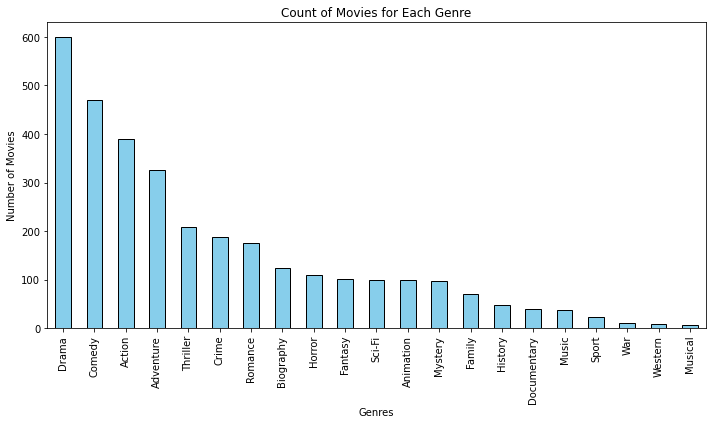

In [29]:
# vertical barplot
genre_counts = dataset_expanded['genres'].str.split(',', expand=True).stack().value_counts()

# Step 2: Create a bar plot to compare the count of movies for each genre
plt.figure(figsize=(10, 6))  # Set the size of the plot
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 3: Add labels and title to the plot
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Count of Movies for Each Genre')

# Step 4: Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

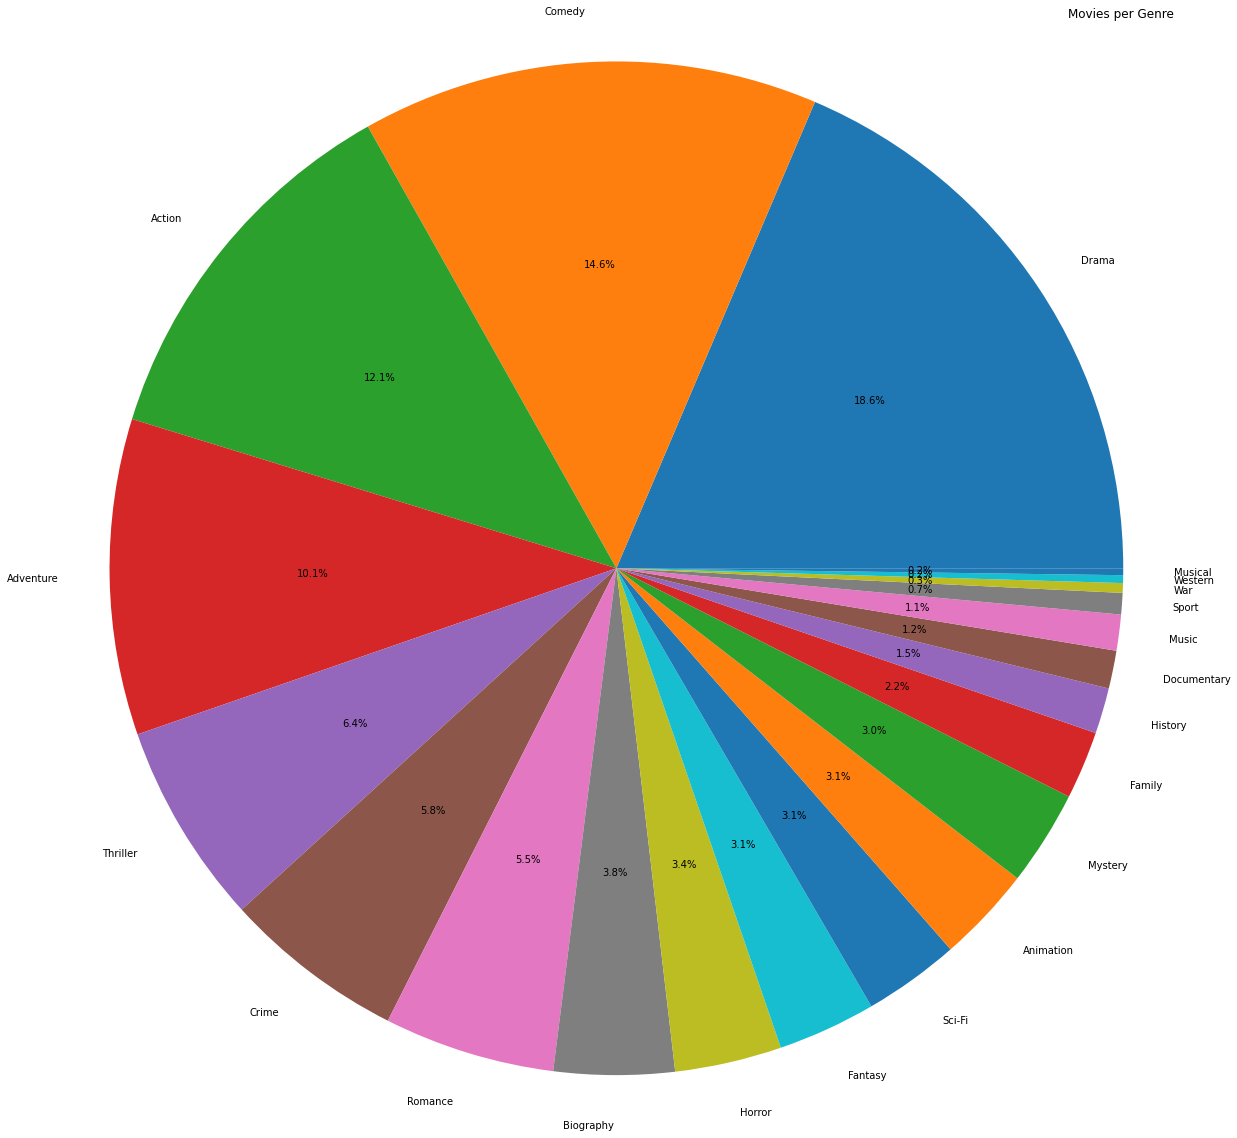

In [30]:
#pie chart
plt.figure(figsize=(20, 20))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Movies per Genre' , loc='right')
plt.axis('equal')
plt.show()


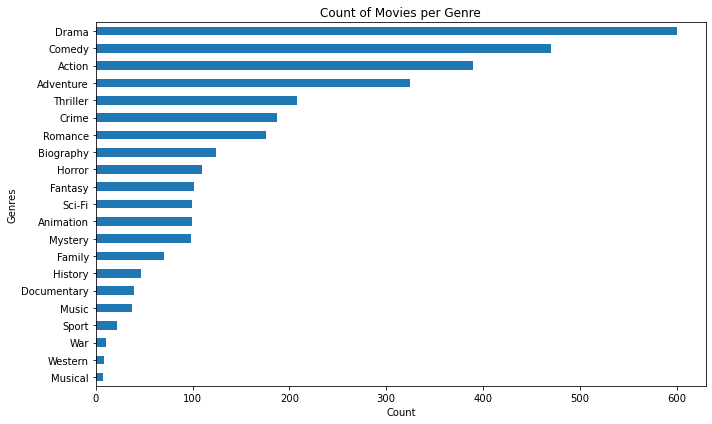

In [31]:
#horizontal bar plot
plt.figure(figsize=(10, 6))
genre_counts.sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Count of Movies per Genre')
plt.tight_layout()
plt.show()


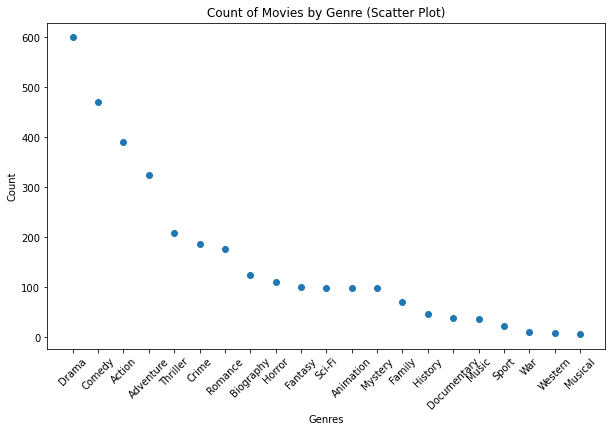

In [32]:
#scatter plot
plt.figure(figsize=(10, 6))
x = range(1, len(genre_counts) + 1)
y = genre_counts.values
plt.scatter(x, y)
plt.xticks(x, genre_counts.index, rotation=45)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movies by Genre (Scatter Plot)')
plt.show()

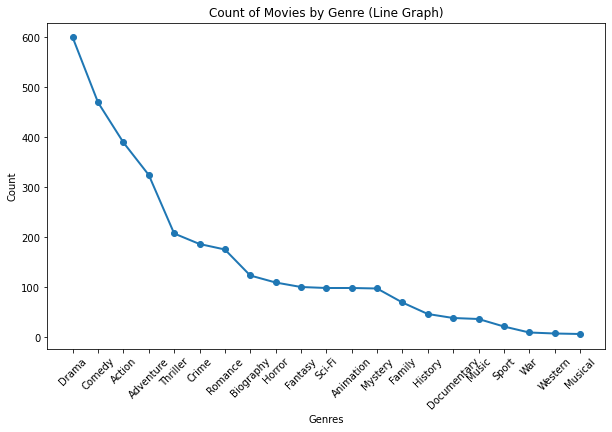

In [33]:
#line graph
plt.figure(figsize=(10, 6))
x = range(1, len(genre_counts) + 1)
y = genre_counts.values
plt.plot(x, y, marker='o', linestyle='-', linewidth=2)
plt.xticks(x, genre_counts.index, rotation=45)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movies by Genre (Line Graph)')
plt.show()

In [34]:
#will now investigate gross earnings per movie genre

In [35]:
#For ease of visualization, I divided the total gross column by a million to get the gross_in_millions
dataset_expanded['gross_in_millions'] = dataset_expanded['total_gross']/ 1000000
dataset_expanded

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross,total_gross,gross_in_millions
1,tt0337692,On the Road,2012,Adventure,6.1,IFC,744000.0,8000000.0,8744000.0,8.744
1,tt0337692,On the Road,2012,Drama,6.1,IFC,744000.0,8000000.0,8744000.0,8.744
1,tt0337692,On the Road,2012,Romance,6.1,IFC,744000.0,8000000.0,8744000.0,8.744
2,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,7.3,Fox,58200000.0,129900000.0,188100000.0,188.100
2,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,7.3,Fox,58200000.0,129900000.0,188100000.0,188.100
...,...,...,...,...,...,...,...,...,...,...
1838,tt8097306,Nobody's Fool,2018,Drama,4.6,Par.,31700000.0,1800000.0,33500000.0,33.500
1838,tt8097306,Nobody's Fool,2018,Romance,4.6,Par.,31700000.0,1800000.0,33500000.0,33.500
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000.0,82847000.0,82.847
1846,tt9151704,Burn the Stage: The Movie,2018,Documentary,8.8,Trafalgar,4200000.0,16100000.0,20300000.0,20.300


In [36]:
#Will now use visualization techniques to compare the gross earnings per movie genre

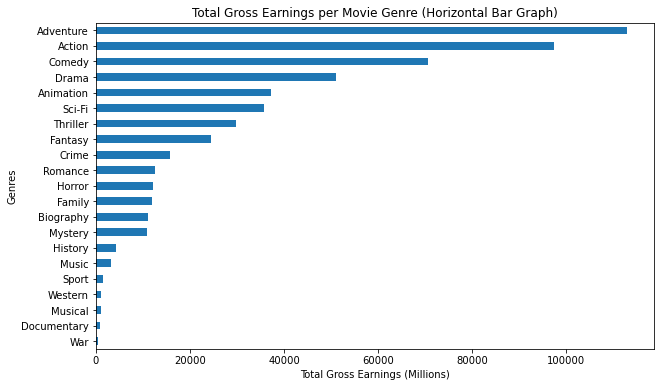

In [37]:
# Assuming you have a DataFrame named 'dataset' with columns 'genres' and 'gross_in_millions'

# Group the data by 'genres' and sum the 'gross_in_millions' for each genre
genre_gross_sum = dataset_expanded.groupby('genres')['gross_in_millions'].sum()

# horizontal bar graph to show total gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_sum.sort_values().plot(kind='barh')
plt.xlabel('Total Gross Earnings (Millions)')
plt.ylabel('Genres')
plt.title('Total Gross Earnings per Movie Genre (Horizontal Bar Graph)')
plt.show()


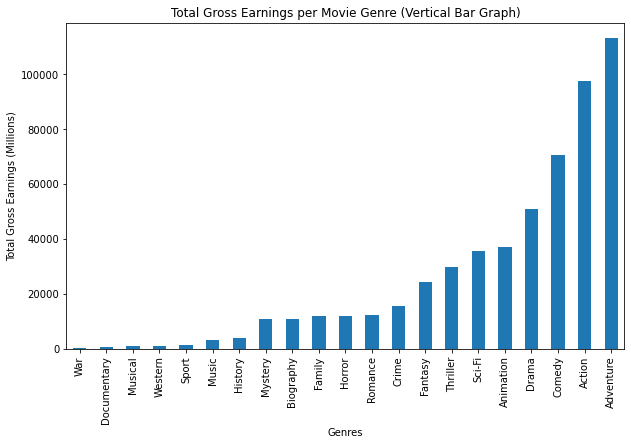

In [38]:
 #vertical bar graph to show total gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_sum.sort_values().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Total Gross Earnings (Millions)')
plt.title('Total Gross Earnings per Movie Genre (Vertical Bar Graph)')
plt.show()


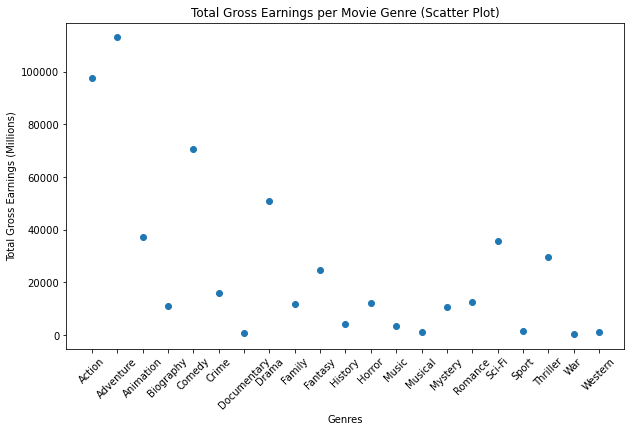

In [39]:
#a scatter plot to show total gross earnings per movie genre
plt.figure(figsize=(10, 6))
plt.scatter(genre_gross_sum.index, genre_gross_sum.values)
plt.xlabel('Genres')
plt.ylabel('Total Gross Earnings (Millions)')
plt.title('Total Gross Earnings per Movie Genre (Scatter Plot)')
plt.xticks(rotation=45)
plt.show()

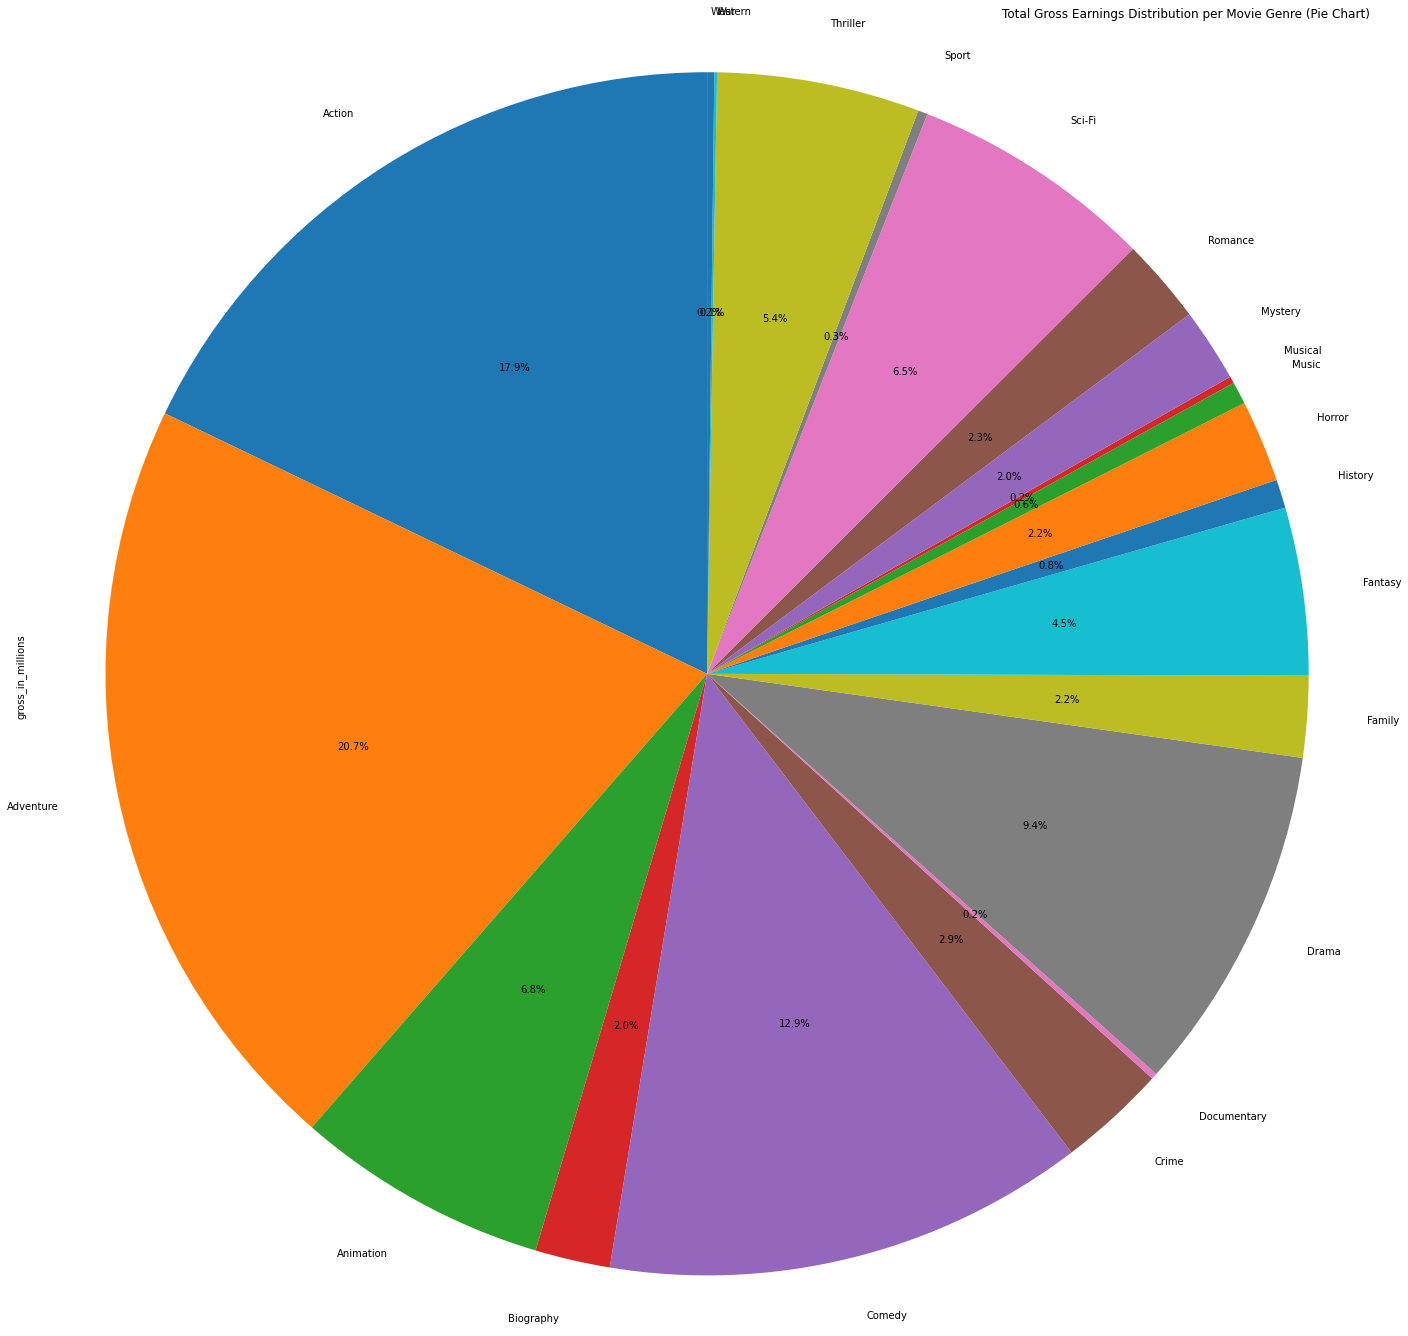

In [40]:
#a pie chart to show total gross earnings distribution per movie genre
plt.figure(figsize=(24, 24))
genre_gross_sum.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Gross Earnings Distribution per Movie Genre (Pie Chart)',loc='right')
plt.axis('equal')
plt.show()

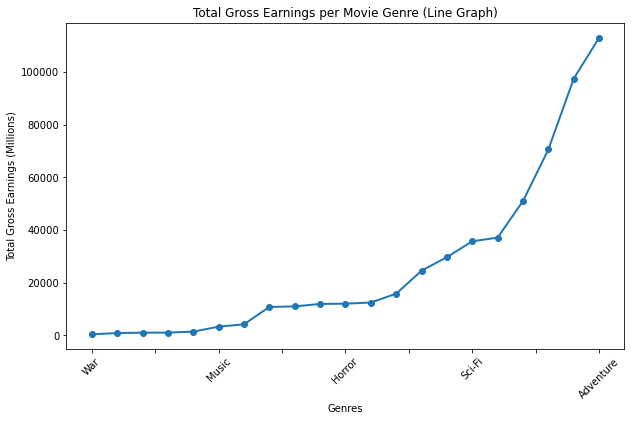

In [41]:
# A line graph to show total gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_sum.sort_values().plot(marker='o', linestyle='-', linewidth=2)
plt.xlabel('Genres')
plt.ylabel('Total Gross Earnings (Millions)')
plt.title('Total Gross Earnings per Movie Genre (Line Graph)')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Getting the average gross earnings per movie genre

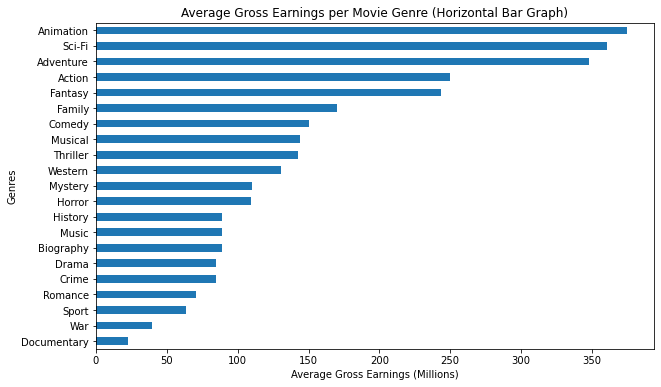

In [43]:
genre_gross_avg = dataset_expanded.groupby('genres')['gross_in_millions'].mean()

# a horizontal bar graph to show average gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_avg.sort_values().plot(kind='barh')
plt.xlabel('Average Gross Earnings (Millions)')
plt.ylabel('Genres')
plt.title('Average Gross Earnings per Movie Genre (Horizontal Bar Graph)')
plt.show()

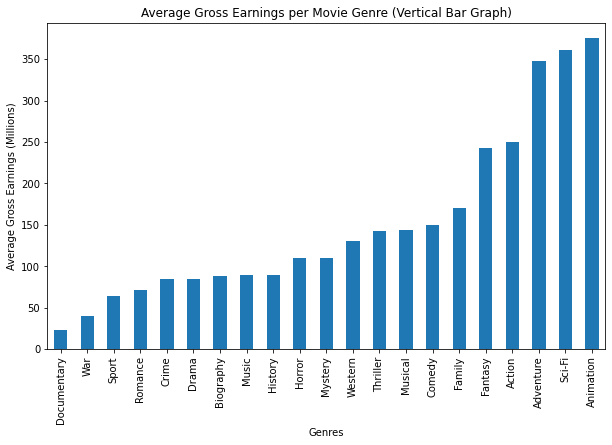

In [44]:
#vertical bar graph to show average gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_avg.sort_values().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Average Gross Earnings (Millions)')
plt.title('Average Gross Earnings per Movie Genre (Vertical Bar Graph)')
plt.show()

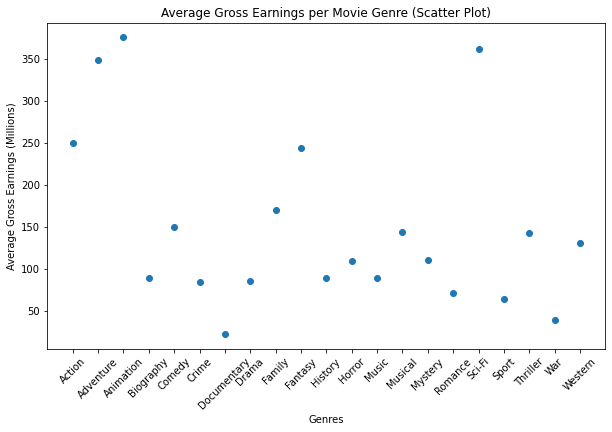

In [45]:
#a scatter plot to show average gross earnings per movie genre
plt.figure(figsize=(10, 6))
plt.scatter(genre_gross_avg.index, genre_gross_avg.values)
plt.xlabel('Genres')
plt.ylabel('Average Gross Earnings (Millions)')
plt.title('Average Gross Earnings per Movie Genre (Scatter Plot)')
plt.xticks(rotation=45)
plt.show()

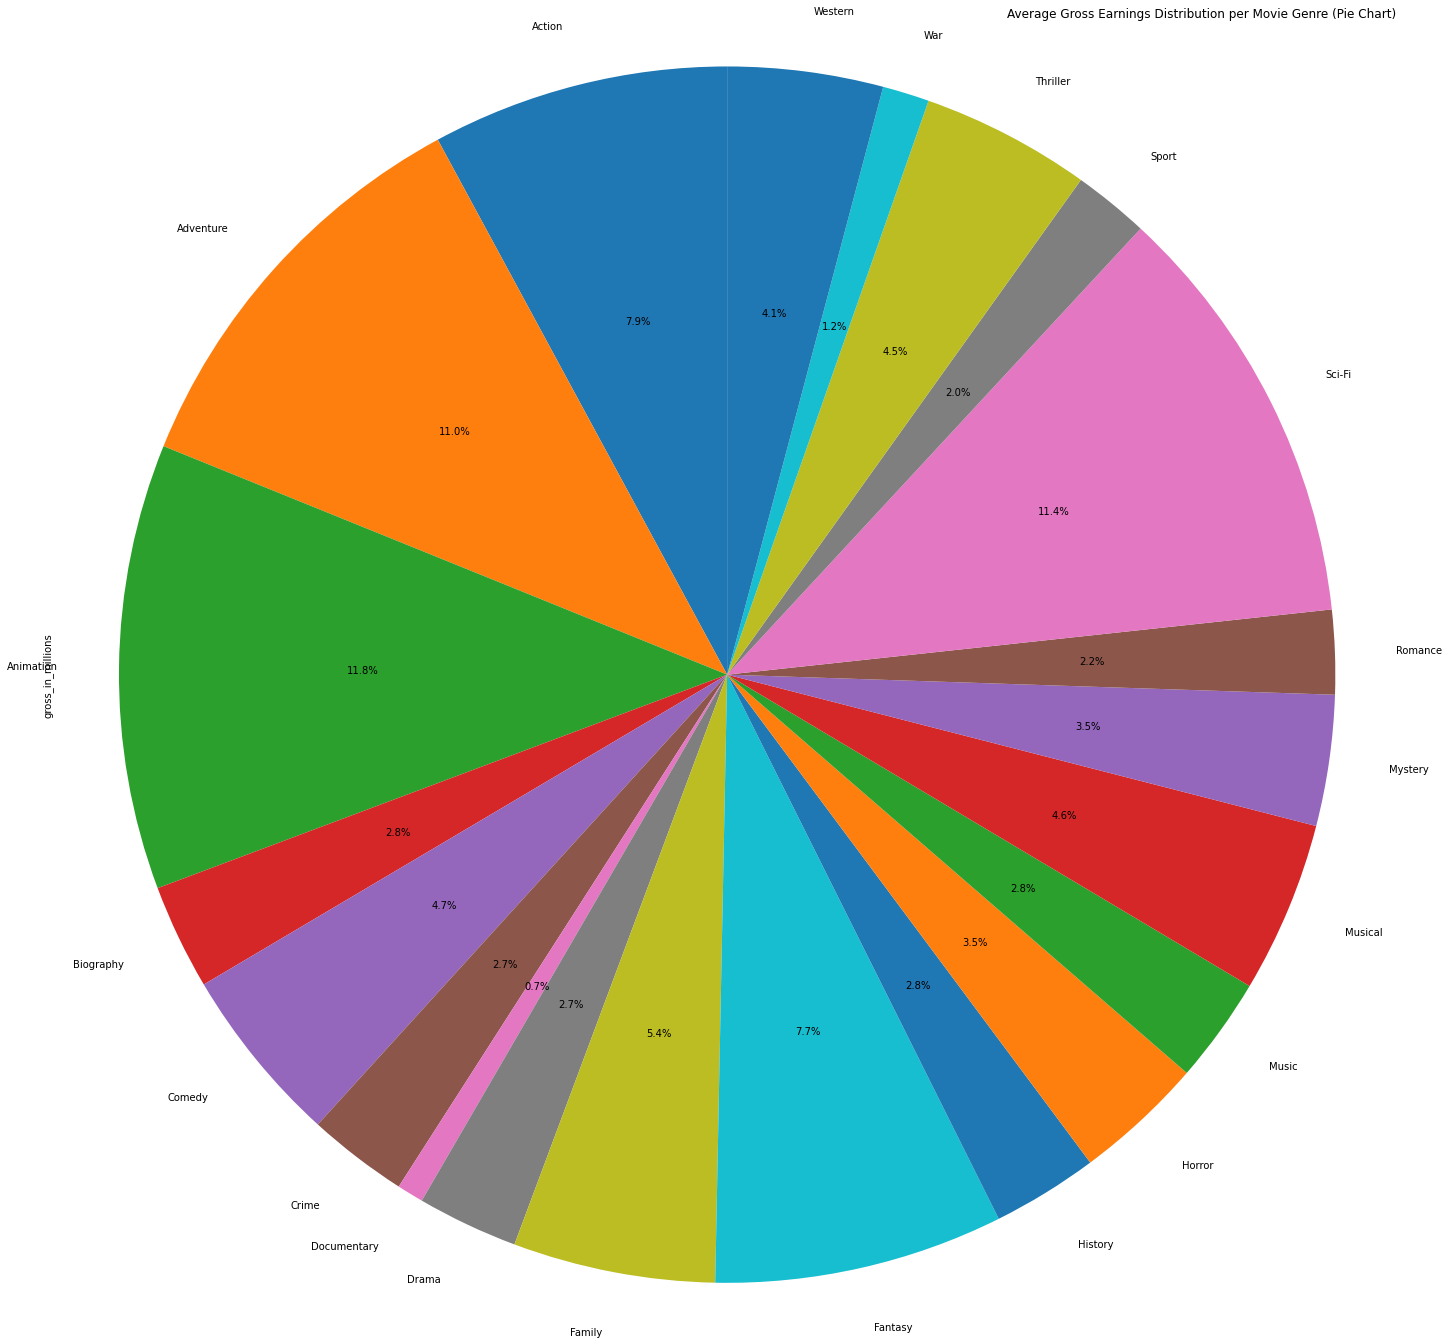

In [46]:
#a pie chart to show average gross earnings distribution per movie genre
plt.figure(figsize=(24, 24))
genre_gross_avg.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Gross Earnings Distribution per Movie Genre (Pie Chart)' , loc = 'right')
plt.axis('equal')
plt.show()

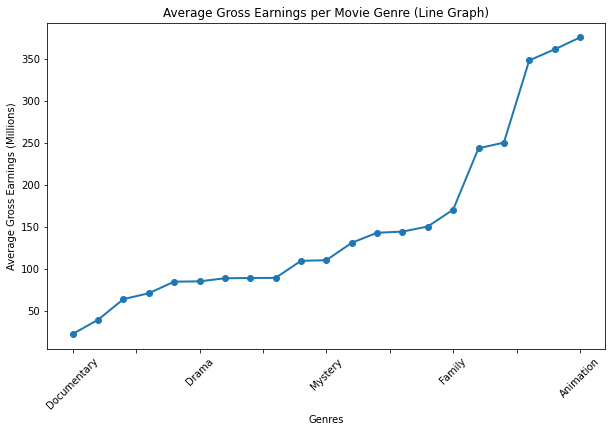

In [47]:
#a line graph to show average gross earnings per movie genre
plt.figure(figsize=(10, 6))
genre_gross_avg.sort_values().plot(marker='o', linestyle='-', linewidth=2)
plt.xlabel('Genres')
plt.ylabel('Average Gross Earnings (Millions)')
plt.title('Average Gross Earnings per Movie Genre (Line Graph)')
plt.xticks(rotation=45)
plt.show()

In [48]:
lowest_year = dataset_expanded['year'].min()
highest_year = dataset_expanded['year'].max()
print("Lowest year:", lowest_year)
print("Highest year:", highest_year)

Lowest year: 2010
Highest year: 2018
